# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains:

"N": Nitrogen content ratio in the soil
"P": Phosphorous content ratio in the soil
"K": Potassium content ratio in the soil
"pH" value of the soil
"crop": categorical values that contain various crops (target variable).
Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the "crop" column is the optimal choice for that field.

In this project, you will build multi-class classification models to predict the type of "crop" and identify the single most importance feature for predictive performance.

In [34]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

In [35]:
# 1.1. Take a look at the structure of our data

print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [36]:
# 1.2. Get a description of main parameters

print(crops[["N", "P", "K", "ph"]].describe())

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [37]:
# 1.3. Check if missing values

print(crops.isna().sum().sort_values())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [38]:
# 1.4. Check for crop types

print(crops["crop"].unique())
print(crops["crop"].nunique())
print(crops["crop"].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22
crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


From step 1.1 to 1.4 we performed a exploratory data analysis after reading the data into a pandas DataFrame.

1.1. We have N, P and K as integers, ph as float and crops as string

1.2. All columns hace 2200 observations, unit is missing for N, P and K

1.3. No missing values allthough in N we have 0 as value from min in step above

1.4. 22 types of crops evenly distributed with 100 observations for each

Note: It is important to split our data before imputing any data to avoid *data leakage* bringing test data set to our model.

In [39]:
# 2.1 Feature and target separation
# X = crops[["N", "P", "K", "ph"]].values
# y = crops["crop"].values

X = crops[["N", "P", "K", "ph"]]
y = crops["crop"]

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [40]:
# 2.2 Unpack the results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

# Note: if we remove stratify=y the count bellow shows a randomized asortment within crop types

print(pd.Series(y_train).value_counts())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
crop
orange         80
grapes         80
coconut        80
papaya         80
pomegranate    80
mango          80
jute           80
watermelon     80
rice           80
maize          80
pigeonpeas     80
blackgram      80
apple          80
muskmelon      80
coffee         80
mungbean       80
lentil         80
banana         80
cotton         80
mothbeans      80
kidneybeans    80
chickpea       80
Name: count, dtype: int64


In steps 2.1 and 2.2 we have defined out feature and target stes and split equaly within crop types in test and train sets. Since we dont need to impute data we can move to evaluating the feature performance.

In [53]:
# 3.1 Create a dictionary to store each features predictive performance
# 3.2 Loop through the features 
# 3.3 Training a multi-class classifier algorithm
# 3.4 Predicting target values using the test set
# 3.5 Evaluating the performance of each feature

features_dict = {}

for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=8000)
    log_reg.fit(X_train[[feature]], y_train)
    # Predict on the test set
    y_pred = log_reg.predict(X_test[[feature]])
    # Evaluate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    features_dict[feature] = {"accuracy": accuracy, "f1_score": f1}

print(features_dict)

{'N': {'accuracy': 0.15, 'f1_score': 0.11688776069853705}, 'P': {'accuracy': 0.20454545454545456, 'f1_score': 0.16173507188696992}, 'K': {'accuracy': 0.32954545454545453, 'f1_score': 0.2882613504287992}, 'ph': {'accuracy': 0.09772727272727273, 'f1_score': 0.07468885067698207}}


In [55]:
# Step 4.1 Create the best_predictive_feature variable

# Identify the best predictive feature based on F1 score
best_predictive_feature = max(features_dict.items(), key=lambda x: x[1]["f1_score"])
print(f"\nBest Predictive Feature: {best_predictive_feature[0]} with F1-score: {best_predictive_feature[1]['f1_score']:.4f}")


Best Predictive Feature: K with F1-score: 0.2883


Conclusion from steps 3.1 to 3.5

Feature K (Potassium):

The highest accuracy (about 32.95%) was achieved using K. This suggests that potassium levels in the soil might have the most significant influence on determining the crop type compared to the other features.
Feature P (Phosphorus):

The second-best performance (about 20.45%) comes from phosphorus. While it contributes more than N (Nitrogen) or ph, its predictive power is still relatively low.
Feature N (Nitrogen):

Nitrogen performs poorly, with an accuracy of only 15%. This suggests that nitrogen levels alone are not very predictive for identifying the crop type.
Feature ph (Soil pH):

The worst performance (about 9.77%) comes from soil pH. This indicates that soil pH alone contributes very little to predicting the crop type.

Before moving to the creation of the best_predictive_feature variable, lets test with standardized values.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(type(X_train_scaled))
print(type(X_test_scaled))

features_dict = {}

# Loop through the features
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=10000)
    # Use scaled feature for training
    log_reg.fit(X_train_scaled[[feature]], y_train)
    # Predict on the scaled test set
    y_pred = log_reg.predict(X_test_scaled[[feature]])
    # Evaluate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    features_dict[feature] = accuracy

print(features_dict)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{'N': 0.13863636363636364, 'P': 0.19090909090909092, 'K': 0.27954545454545454, 'ph': 0.09772727272727273}


The worse performance after scaling could occur due to several reasons, depending on the characteristics of your data and the relationship between features and the target variable. Here's an analysis of why this might be happening:

1. Scaling Removes the Natural Feature Distribution
Before Scaling: The features retained their original scale, which might inherently capture some meaningful information about the relationship between the features and the target variable.
After Scaling: Standardization centers the data to have a mean of 0 and a standard deviation of 1. This could potentially disrupt meaningful patterns if the raw values' magnitudes are significant for the prediction task.
Example: Suppose the absolute values of nitrogen (N) directly correlate with a certain crop. Scaling N removes this magnitude, reducing its predictive power when used alone.

2. Single-Feature Models Are More Affected
Each logistic regression model is trained on a single feature. Scaling might disproportionately impact features with clear and strong associations to the target.
Example: If K (Potassium) had a strong relationship with certain crop types based on its raw range, standardizing could mask these differences, making it harder for the model to identify patterns.
3. Feature Distribution and Class Overlap
Standardization assumes the features follow a Gaussian distribution (roughly bell-shaped). If your features have a skewed or non-Gaussian distribution, scaling might not improve or could even degrade performance.
Example: If K naturally separates the crops in its original scale, but scaling centers and shrinks its range, the classes might become harder to distinguish.
4. Interaction Between Features
Logistic regression on a single feature may fail to capture the relationships between features, especially after scaling. For example, raw K values might interact better with raw P values for classification, but scaling disrupts this synergy.
5. Scaling Is Less Relevant for Single-Feature Models
Standardization is crucial when combining multiple features (e.g., in a full logistic regression model with all features). However, when using a single feature at a time, scaling is less impactful, and raw values might perform better.

Lets investigate further by ploting each feature to observe the distribution shape.

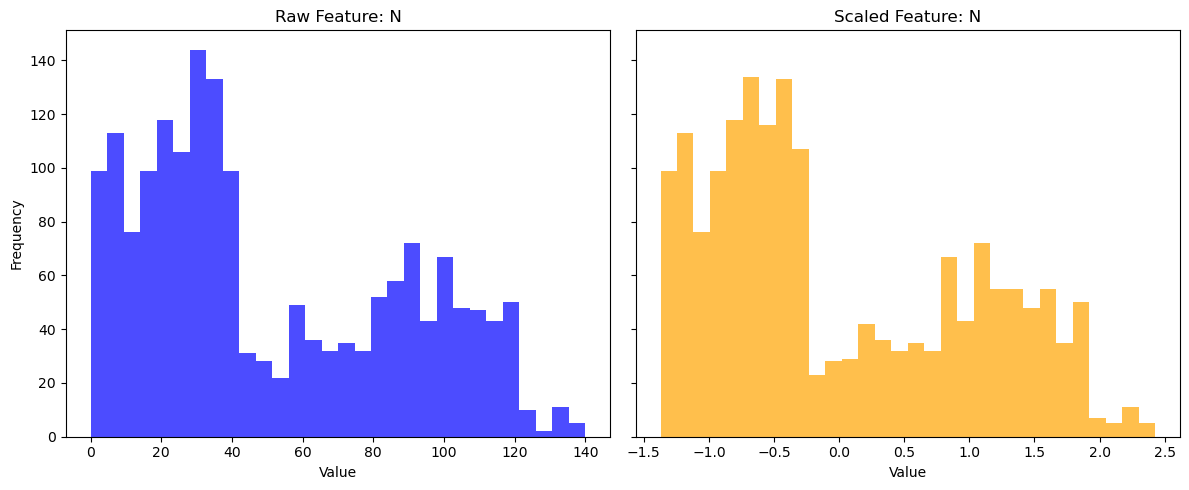

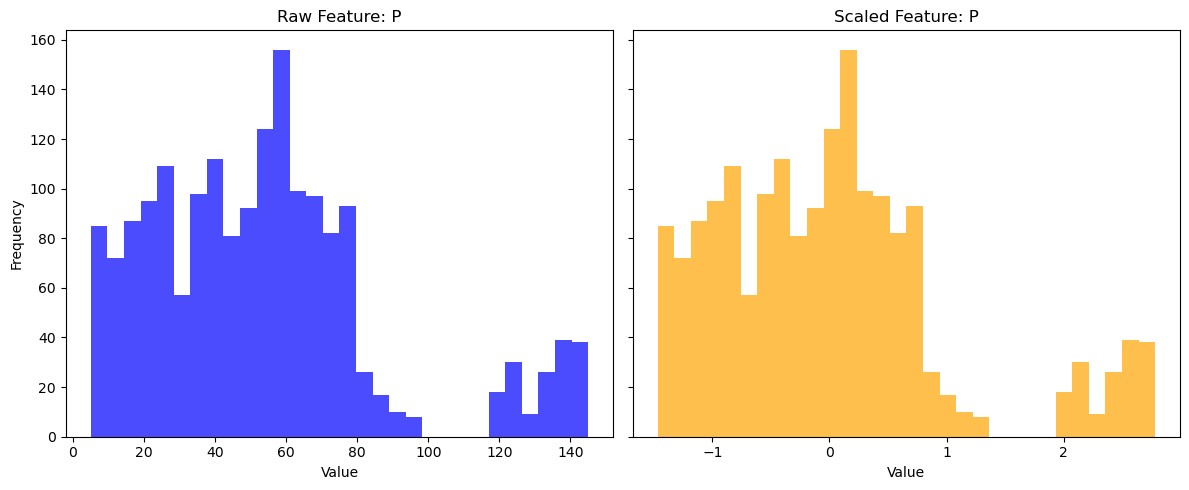

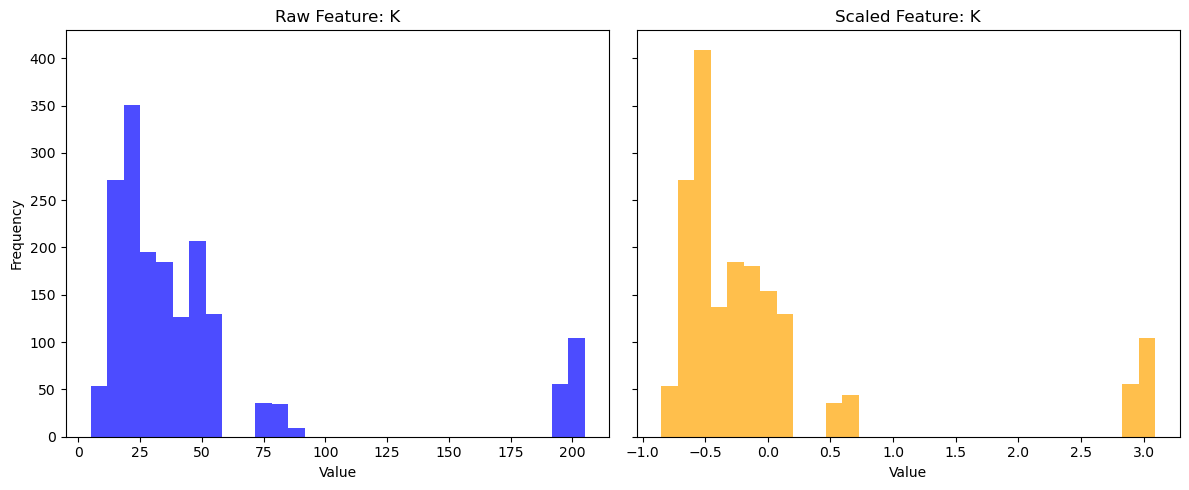

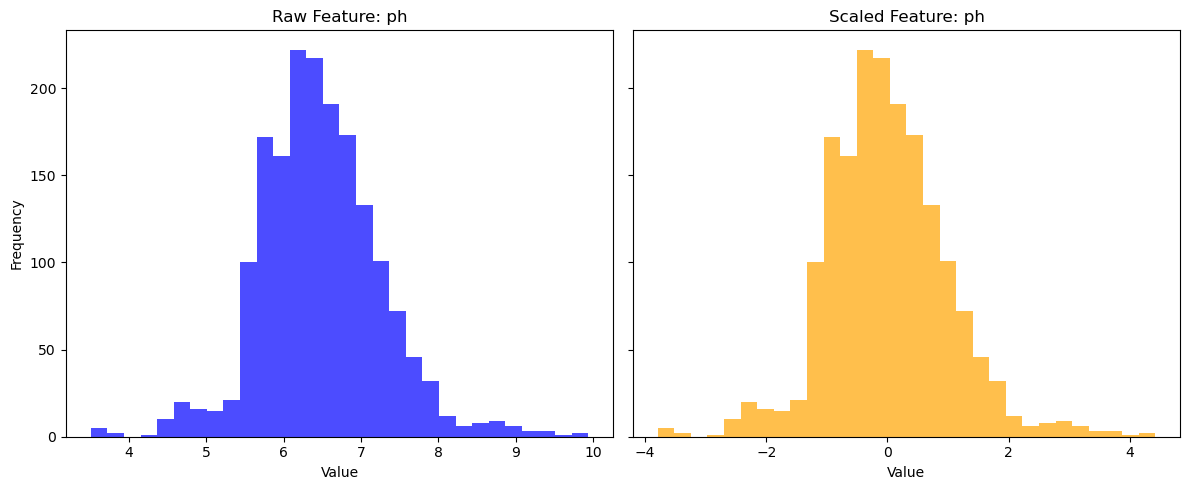

In [43]:
import matplotlib.pyplot as plt

for feature in ["N", "P", "K", "ph"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Raw data
    axes[0].hist(X_train[feature], bins=30, alpha=0.7, color="blue")
    axes[0].set_title(f"Raw Feature: {feature}")
    axes[0].set_xlabel("Value")
    axes[0].set_ylabel("Frequency")

    # Scaled data
    axes[1].hist(X_train_scaled[feature], bins=30, alpha=0.7, color="orange")
    axes[1].set_title(f"Scaled Feature: {feature}")
    axes[1].set_xlabel("Value")

    plt.tight_layout()
    plt.show()

We observe that besides the ph, the distribution is non-gaussian, therefore explaining the loss of accuracy when applying standartization. Now lets check correlations and train model in multiple features

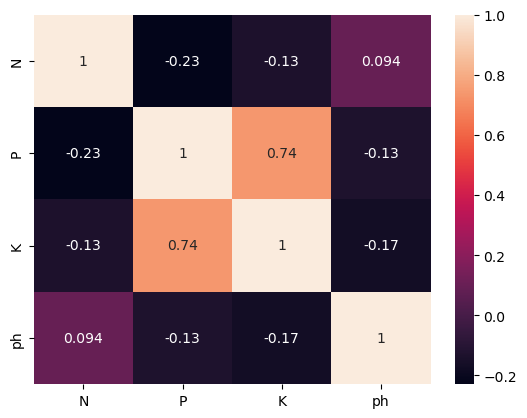

In [50]:
import seaborn as sns
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [45]:
log_reg_all = LogisticRegression(max_iter=10000)
log_reg_all.fit(X_train_scaled, y_train)
y_pred_all = log_reg_all.predict(X_test_scaled)
accuracy_all = metrics.accuracy_score(y_test, y_pred_all)
print(f"Accuracy using all features (scaled): {accuracy_all:.2f}")


Accuracy using all features (scaled): 0.68
